# 과대적합과 과소적합
https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko

과대적합(overfitting)
- 테스트 세트(또는 이전에 본 적 없는 데이터)에 잘 일반화하기 위해 과대적합 개선해야 함
- 1) 더 많은 훈련 데이터 2) regularization 이용 (모델이 저장하는 정보의 양과 종류에 제약) 

과소적합(underfitting)
- 네트워크가 훈련 세트에서 적절한 패턴을 학습하지 못함
- 모델이 너무 단순하거나, 규제가 너무 많거나, 그냥 단순히 충분히 오래 훈련하지 않는 경우

In [2]:
import tensorflow as tf 
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt 

print(tf.__version__)

2.5.0-dev20201230


imdb 데이터를 멀티-핫 인코딩(multi-hot encoding)으로 변환 -> 이 모델은 훈련 세트에 빠르게 과대적합될 것

In [6]:
NUM_WORDS = 1000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprec

In [8]:
test_data[0] # 각 단어가 숫자로 표현됨

[1,
 591,
 202,
 14,
 31,
 6,
 717,
 10,
 10,
 2,
 2,
 5,
 4,
 360,
 7,
 4,
 177,
 2,
 394,
 354,
 4,
 123,
 9,
 2,
 2,
 2,
 10,
 10,
 13,
 92,
 124,
 89,
 488,
 2,
 100,
 28,
 2,
 14,
 31,
 23,
 27,
 2,
 29,
 220,
 468,
 8,
 124,
 14,
 286,
 170,
 8,
 157,
 46,
 5,
 27,
 239,
 16,
 179,
 2,
 38,
 32,
 25,
 2,
 451,
 202,
 14,
 6,
 717]

In [17]:
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension)) # 데이터 수, 각 데이터의 디멘젼
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

# train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
# test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

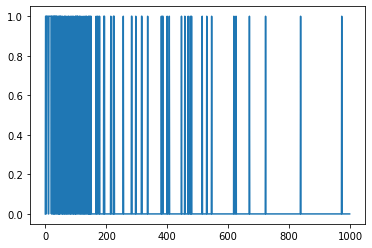

In [18]:
plt.plot(train_data[0]) # 해당 단어가 있으면 1, 없으면 0 

과대적합 막는 방법 
- 모델 축소 (모델에 학습 가능한 parameter 수를 줄이기 - layer 혹은 unit 개수)
- 딥러닝: parameter 수 = 모델의 "용량"으로 봄

어떤 모델의 (층의 개수나 뉴런 개수에 해당하는) 적절한 크기나 구조를 결정하는 마법같은 공식은 없습니다.
- 새로운 층을 추가하거나 층 크기를 늘리면서 실험해봐야 함 

In [20]:
# 기준 모델 만들기 (축소할 것인가? 확대할 것인가?)
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
baseline_model.compile(optimizer='adam', loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [22]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels), # 왜 test로..?
                                      verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6028 - accuracy: 0.6825 - binary_crossentropy: 0.6028 - val_loss: 0.4574 - val_accuracy: 0.8107 - val_binary_crossentropy: 0.4574
Epoch 2/20
49/49 - 0s - loss: 0.3788 - accuracy: 0.8426 - binary_crossentropy: 0.3788 - val_loss: 0.3445 - val_accuracy: 0.8536 - val_binary_crossentropy: 0.3445
Epoch 3/20
49/49 - 0s - loss: 0.3227 - accuracy: 0.8666 - binary_crossentropy: 0.3227 - val_loss: 0.3330 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3330
Epoch 4/20
49/49 - 0s - loss: 0.3069 - accuracy: 0.8724 - binary_crossentropy: 0.3069 - val_loss: 0.3309 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3309
Epoch 5/20
49/49 - 0s - loss: 0.3030 - accuracy: 0.8742 - binary_crossentropy: 0.3030 - val_loss: 0.3322 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3322
Epoch 6/20
49/49 - 0s - loss: 0.2938 - accuracy: 0.8803 - binary_crossentropy: 0.2938 - val_loss: 0.3291 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3291
Epoch 7/20
49/49 - 0s - loss

In [24]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary() # params가 훨씬 줄어듦

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [25]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6245 - accuracy: 0.6687 - binary_crossentropy: 0.6245 - val_loss: 0.5254 - val_accuracy: 0.7834 - val_binary_crossentropy: 0.5254
Epoch 2/20
49/49 - 0s - loss: 0.4500 - accuracy: 0.8190 - binary_crossentropy: 0.4500 - val_loss: 0.4058 - val_accuracy: 0.8357 - val_binary_crossentropy: 0.4058
Epoch 3/20
49/49 - 0s - loss: 0.3695 - accuracy: 0.8528 - binary_crossentropy: 0.3695 - val_loss: 0.3616 - val_accuracy: 0.8507 - val_binary_crossentropy: 0.3616
Epoch 4/20
49/49 - 0s - loss: 0.3360 - accuracy: 0.8639 - binary_crossentropy: 0.3360 - val_loss: 0.3433 - val_accuracy: 0.8560 - val_binary_crossentropy: 0.3433
Epoch 5/20
49/49 - 0s - loss: 0.3203 - accuracy: 0.8690 - binary_crossentropy: 0.3203 - val_loss: 0.3348 - val_accuracy: 0.8581 - val_binary_crossentropy: 0.3348
Epoch 6/20
49/49 - 0s - loss: 0.3117 - accuracy: 0.8719 - binary_crossentropy: 0.3117 - val_loss: 0.3304 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3304
Epoch 7/20
49/49 - 0s - loss

In [26]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [28]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4579 - accuracy: 0.7716 - binary_crossentropy: 0.4579 - val_loss: 0.3363 - val_accuracy: 0.8571 - val_binary_crossentropy: 0.3363
Epoch 2/20
49/49 - 0s - loss: 0.2914 - accuracy: 0.8780 - binary_crossentropy: 0.2914 - val_loss: 0.3214 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3214
Epoch 3/20
49/49 - 0s - loss: 0.2261 - accuracy: 0.9120 - binary_crossentropy: 0.2261 - val_loss: 0.3348 - val_accuracy: 0.8561 - val_binary_crossentropy: 0.3348
Epoch 4/20
49/49 - 0s - loss: 0.1095 - accuracy: 0.9674 - binary_crossentropy: 0.1095 - val_loss: 0.4145 - val_accuracy: 0.8495 - val_binary_crossentropy: 0.4145
Epoch 5/20
49/49 - 0s - loss: 0.0235 - accuracy: 0.9966 - binary_crossentropy: 0.0235 - val_loss: 0.5248 - val_accuracy: 0.8486 - val_binary_crossentropy: 0.5248
Epoch 6/20
49/49 - 0s - loss: 0.0043 - accuracy: 0.9998 - binary_crossentropy: 0.0043 - val_loss: 0.6196 - val_accuracy: 0.8518 - val_binary_crossentropy: 0.6196
Epoch 7/20
49/49 - 0s - loss

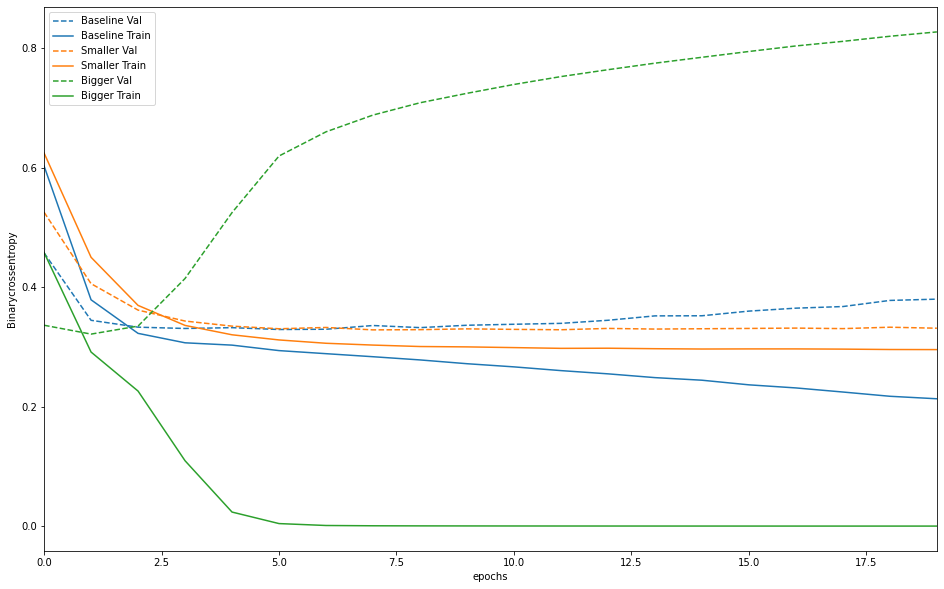

In [29]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_' + key], 
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')
    
    plt.xlabel("epochs")
    plt.ylabel(key.replace('_', '').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])
    

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])
   

weight regularization
- "간단한 모델"은 모델 파라미터의 entropy가 낮은 모델(모델 파라미터 분포가 균일해지도록)
- L1: 가중치 절대값에 비례 -> 가중치를 0으로 만들기도 함
- L2: 가중치 제곱에 비례 (weight decay) -> 가중치를 0 가까이 만드나, 0까지는 안 됨

In [ ]:
l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)